## Covid-19 Data Exploration and Cleanup

In [1]:
# Import libraries
import pandas as pd
import matplotlib as plt

# This was used for our t-test
import scipy
from scipy.stats import ttest_ind
#import scipy.stats as stats

# This was to change our date type from int64 to datetime64
import datetime

# SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
# This is a warning and not an error
import warnings
warnings.filterwarnings('ignore')

# Output File (CSV), need 3 files for 3 sets of data for comparison
output_data_file_1 = "output_data/data_source_1.csv"
output_data_file_2 = "output_data/data_source_2.csv"
output_data_file_3 = "output_data/data_source_3.csv"

## Five resources were used for data analysis.
### From those five, three different COVID-19 data sources were chosen for comparison.
  

## The null hypothesis is that our populations are statistically significantly different.

### Source 1 Covid data import and clean up for file 1
#### This will be output into output_data/data_source_1

In [2]:
#Load data for source 1

#Resource = https://covidtracking.com/data/download
# The COVID Tracking Project is a volunteer organization launched from The Atlantic magazine/website.
# This website was the source of data for a lot of the sites we found with COVID-19 data. 
# Per their website:  almost all of the data we compile is taken directly from the websites of local or
# state/territory public health authorities.  Where data is missing from these websites, 
# we supplement available numbers with information from official press conferences with governors or public health authorities.


# Load file 1 to read
covid_data_1 = "Resources/daily.csv"

# Read csv file into DataFrame, set state as index
covid_df_1 = pd.read_csv(covid_data_1, index_col = "state")
covid_df_1

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
state,,,,,,,,,,,,,,,,,,,,,
AK,20200717,2081.0,163333.0,NaN,32.0,NaN,NaN,NaN,0.0,NaN,...,165414,0,0,e904def0e1f67ac528572f0506eef868c163a3f3,0,0,0,0,0,NaN
AL,20200717,63091.0,500024.0,NaN,1416.0,7584.0,NaN,967.0,NaN,521.0,...,563115,35,0,5bb063f5f4fe7c02d748b1fee5b811ac19d8f8ba,0,0,0,0,0,NaN
AR,20200717,31762.0,375735.0,NaN,464.0,2070.0,NaN,NaN,97.0,298.0,...,407497,12,76,c1ffb0bb728cd1ac03f834ec70d20070b443f395,0,0,0,0,0,NaN
AS,20200717,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,b0c23fca3c4bb610a1625c60aca491eab6a71161,0,0,0,0,0,NaN
AZ,20200717,138523.0,626445.0,NaN,3466.0,6402.0,944.0,NaN,687.0,NaN,...,764968,91,106,fc227a78fd73620678a4d4cb836c128b38541778,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WA,20200126,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,7acb526e14f20a29cc74a0b32a37328bc6eac6c2,0,0,0,0,0,NaN
WA,20200125,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,9b52ca94dd2a996822542ea5f17a7363e7ad91cf,0,0,0,0,0,NaN
WA,20200124,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,094154f68e74bfc30b977cdee888f9c07be4360e,0,0,0,0,0,NaN


In [3]:
# Narrow down columns to those of interest
df_1 = covid_df_1[["date", "positive", 'negative']]
df_1

,date,positive,negative
state,,,
AK,20200717,2081.0,163333.0
AL,20200717,63091.0,500024.0
AR,20200717,31762.0,375735.0
AS,20200717,0.0,1037.0
AZ,20200717,138523.0,626445.0
...,...,...,...
WA,20200126,2.0,0.0
WA,20200125,2.0,0.0
WA,20200124,2.0,0.0


In [4]:
# Filter out specific states for analysis - FL, GA, TX, NY, NJ, CT
states = ["FL", "GA", "TX", "NY", "NJ", "CT"]
filter_df_1  = df_1[df_1.index.isin(states)]
filter_df_1

,date,positive,negative
state,,,
CT,20200717,47893.0,582076.0
FL,20200717,327241.0,2553527.0
GA,20200717,135183.0,1063495.0
NJ,20200717,176551.0,1592377.0
NY,20200717,405551.0,4593898.0
...,...,...,...
TX,20200305,1.0,NaN
FL,20200304,2.0,24.0
GA,20200304,2.0,NaN


In [5]:
# Rename state codes to Florida, Georgia, New York, Texas and Washington
state_name_df = filter_df_1.rename(index={"FL": "Florida", "GA": "Georgia", "NY": "New York",
                                          "TX": "Texas", "NJ":"New Jersey", "CT": "Connecticut"})
state_name_df

,date,positive,negative
state,,,
Connecticut,20200717,47893.0,582076.0
Florida,20200717,327241.0,2553527.0
Georgia,20200717,135183.0,1063495.0
New Jersey,20200717,176551.0,1592377.0
New York,20200717,405551.0,4593898.0
...,...,...,...
Texas,20200305,1.0,NaN
Florida,20200304,2.0,24.0
Georgia,20200304,2.0,NaN


In [6]:
# Narrow down data to date range 3/1/20 to 7/17/20
# Set date range for data
start_date = 20200301
end_date = 20200717
after_start_date = state_name_df["date"] >= start_date
before_end_date = state_name_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates_1 = state_name_df.loc[between_two_dates]
filtered_dates_1

,date,positive,negative
state,,,
Connecticut,20200717,47893.0,582076.0
Florida,20200717,327241.0,2553527.0
Georgia,20200717,135183.0,1063495.0
New Jersey,20200717,176551.0,1592377.0
New York,20200717,405551.0,4593898.0
...,...,...,...
Texas,20200305,1.0,NaN
Florida,20200304,2.0,24.0
Georgia,20200304,2.0,NaN


In [7]:
# Sort by date in ascending order
filtered_dates_1 = filtered_dates_1.sort_values(["state", "date"])
filtered_dates_1

,date,positive,negative
state,,,
Connecticut,20200307,0.0,NaN
Connecticut,20200308,1.0,29.0
Connecticut,20200309,1.0,46.0
Connecticut,20200310,2.0,54.0
Connecticut,20200311,3.0,71.0
...,...,...,...
Texas,20200713,264313.0,2275812.0
Texas,20200714,275058.0,2323622.0
Texas,20200715,282365.0,2359834.0


In [8]:
# Rename columns to match formatting of other data sets
state_name_df = state_name_df.rename(columns = {'positive': 'positive cases', 
                                                'negative': 'negative cases'})
state_name_df

,date,positive cases,negative cases
state,,,
Connecticut,20200717,47893.0,582076.0
Florida,20200717,327241.0,2553527.0
Georgia,20200717,135183.0,1063495.0
New Jersey,20200717,176551.0,1592377.0
New York,20200717,405551.0,4593898.0
...,...,...,...
Texas,20200305,1.0,NaN
Florida,20200304,2.0,24.0
Georgia,20200304,2.0,NaN


In [9]:
#Check data types
state_name_df.dtypes

date                int64
positive cases    float64
negative cases    float64
dtype: object

In [10]:
# Use datetime to change formatting of date to match other datasets (from int64 to datetime64)
state_name_df['date'] = pd.to_datetime(state_name_df['date'], format = '%Y%m%d')
state_name_df

,date,positive cases,negative cases
state,,,
Connecticut,2020-07-17,47893.0,582076.0
Florida,2020-07-17,327241.0,2553527.0
Georgia,2020-07-17,135183.0,1063495.0
New Jersey,2020-07-17,176551.0,1592377.0
New York,2020-07-17,405551.0,4593898.0
...,...,...,...
Texas,2020-03-05,1.0,NaN
Florida,2020-03-04,2.0,24.0
Georgia,2020-03-04,2.0,NaN


In [11]:
# Change positive and negative cases type from float to integer to match formatting of other data sets
state_name_df['positive cases'] = state_name_df['positive cases'].astype(int)
state_name_df.dropna(inplace = True)
state_name_df['negative cases'] = state_name_df['negative cases'].astype(int)
state_name_df

,date,positive cases,negative cases
state,,,
Connecticut,2020-07-17,47893,582076
Florida,2020-07-17,327241,2553527
Georgia,2020-07-17,135183,1063495
New Jersey,2020-07-17,176551,1592377
New York,2020-07-17,405551,4593898
...,...,...,...
New York,2020-03-06,33,92
Florida,2020-03-05,9,31
New York,2020-03-05,22,76


In [12]:
# Check data type changes 
#Check data types
state_name_df.dtypes

date              datetime64[ns]
positive cases             int32
negative cases             int32
dtype: object

In [13]:
# Source 1 summary
state_name_df.describe()

,positive cases,negative cases
count,781.000000,7.810000e+02
mean,98747.676056,6.732171e+05
std,113660.646823,8.661586e+05
min,1.000000,2.400000e+01
25%,19815.000000,6.928600e+04
50%,47108.000000,3.517700e+05
75%,150399.000000,9.504720e+05
max,405551.000000,4.593898e+06


In [14]:
# Build summary table for source 1 data

mean = state_name_df.groupby('state').mean()['positive cases']
median = state_name_df.groupby('state').median()['positive cases']
variance = state_name_df.groupby('state').var()['positive cases']
sds = state_name_df.groupby('state').std()['positive cases']
sems = state_name_df.groupby('state').sem()['positive cases']
summary_table_1 = pd.DataFrame({"Mean Positive Cases":mean,
                              "Median Positive Cases":median,
                              "Positive Cases Variance":variance,
                              "Positive Cases Std. Dev.":sds,
                              "Positive Cases Std. Err.":sems})
summary_table_1

,Mean Positive Cases,Median Positive Cases,Positive Cases Variance,Positive Cases Std. Dev.,Positive Cases Std. Err.
state,,,,,
Connecticut,28423.666667,34594.0,3.214926e+08,17930.215907,1560.624978
Florida,64620.220588,40789.0,5.795970e+09,76131.266970,6528.202285
Georgia,43434.172131,37891.0,1.150341e+09,33916.671167,3070.671127
New Jersey,111550.598485,141151.5,4.169745e+09,64573.562069,5620.407161
New York,262419.205882,336225.0,2.163583e+10,147091.244856,12612.970190
Texas,72105.699187,47784.0,5.812745e+09,76241.359491,6874.451876


In [15]:
#Save to csv file
state_name_df.to_csv('output_data/data_source_1.csv')

### Source 2 data import and clean up for file 2
#### This will be output into output_data/data_source_2


In [16]:
# Load data for source 2

# Reference https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset?select=us-counties.csv
# This is a US counties COVID-19 data set from Kaggle.com
# This data is compiled from state and local governments and health departments

covid_data_2 = "Resources/us-counties.csv"

# Read csv file into DataFrame, set state as index
covid_df_2 = pd.read_csv(covid_data_2, index_col = "state")
covid_df_2

,date,county,fips,cases,deaths
state,,,,,
Washington,1/21/2020,Snohomish,53061.0,1,0
Washington,1/22/2020,Snohomish,53061.0,1,0
Washington,1/23/2020,Snohomish,53061.0,1,0
Illinois,1/24/2020,Cook,17031.0,1,0
Washington,1/24/2020,Snohomish,53061.0,1,0
...,...,...,...,...,...
Wyoming,7/19/2020,Sweetwater,56037.0,173,2
Wyoming,7/19/2020,Teton,56039.0,208,1
Wyoming,7/19/2020,Uinta,56041.0,221,0


In [17]:
# Narrow data frame columns to those of interest
df_2 = covid_df_2[['date', 'cases']]
df_2

,date,cases
state,,
Washington,1/21/2020,1
Washington,1/22/2020,1
Washington,1/23/2020,1
Illinois,1/24/2020,1
Washington,1/24/2020,1
...,...,...
Wyoming,7/19/2020,173
Wyoming,7/19/2020,208
Wyoming,7/19/2020,221


In [18]:
# Set index to states
#df_2 = df_2.set_index('state')
#df_2

In [19]:
# Rename the 'cases' column to 'positive cases' to be consistent with other data sets
df_2 = df_2.rename(columns = {'cases': 'positive cases'})
df_2

,date,positive cases
state,,
Washington,1/21/2020,1
Washington,1/22/2020,1
Washington,1/23/2020,1
Illinois,1/24/2020,1
Washington,1/24/2020,1
...,...,...
Wyoming,7/19/2020,173
Wyoming,7/19/2020,208
Wyoming,7/19/2020,221


In [20]:
# Filter for Florida, Georgia, New York, Texas and Washington
states = ["Florida", "Georgia", "New York", "Texas", "New Jersey", "Connecticut"]
filter_df_2  = df_2[df_2.index.isin(states)]
filter_df_2

,date,positive cases
state,,
Texas,2/12/2020,1
Texas,2/13/2020,2
Texas,2/14/2020,2
Texas,2/15/2020,2
Texas,2/16/2020,2
...,...,...
Texas,7/19/2020,174
Texas,7/19/2020,56
Texas,7/19/2020,71


In [21]:
# Set date range for data
start_date = '3/1/2020'
end_date = '7/17/2020'
after_start_date = filter_df_2["date"] >= start_date
before_end_date = filter_df_2["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates_2 = filter_df_2.loc[between_two_dates]
filtered_dates_2

,date,positive cases
state,,
Florida,3/1/2020,1
Florida,3/1/2020,1
New York,3/1/2020,1
Texas,3/1/2020,11
Florida,3/2/2020,1
...,...,...
Texas,7/17/2020,168
Texas,7/17/2020,50
Texas,7/17/2020,68


In [22]:
# Group duplicate dates for each state into a total positive case per day
group_df_2 = filter_df_2.groupby(["state", "date"])
group_df_2['positive cases'].sum()

state        date     
Connecticut  3/10/2020         2
             3/11/2020         3
             3/12/2020         6
             3/13/2020        11
             3/14/2020        20
                           ...  
Texas        7/5/2020     200137
             7/6/2020     209350
             7/7/2020     219164
             7/8/2020     229116
             7/9/2020     240025
Name: positive cases, Length: 853, dtype: int64

In [23]:
# Save data frame to a CSV file
group_df_2 = filter_df_2.groupby(["state", "date"])
group_df_2.sum().reset_index().to_csv('output_data/group_df_2.csv')

In [24]:
# Open newly saved data CSV file
new = "output_data/group_df_2.csv"
new_df_2 = pd.read_csv(new)
new_df_2

,Unnamed: 0,state,date,positive cases
0,0,Connecticut,3/10/2020,2
1,1,Connecticut,3/11/2020,3
2,2,Connecticut,3/12/2020,6
3,3,Connecticut,3/13/2020,11
4,4,Connecticut,3/14/2020,20
...,...,...,...,...
848,848,Texas,7/5/2020,200137
849,849,Texas,7/6/2020,209350
850,850,Texas,7/7/2020,219164
851,851,Texas,7/8/2020,229116


In [25]:
# Select for columns of interest
new_df_2 = new_df_2[['state', 'date', 'positive cases']]
new_df_2

,state,date,positive cases
0,Connecticut,3/10/2020,2
1,Connecticut,3/11/2020,3
2,Connecticut,3/12/2020,6
3,Connecticut,3/13/2020,11
4,Connecticut,3/14/2020,20
...,...,...,...
848,Texas,7/5/2020,200137
849,Texas,7/6/2020,209350
850,Texas,7/7/2020,219164
851,Texas,7/8/2020,229116


In [26]:
# This had a warning - SettingWithCopyWarning
# Alter date format to be consistent with other data frames
new_df_2['date'] = pd.to_datetime(new_df_2['date'])
new_df_2

,state,date,positive cases
0,Connecticut,2020-03-10,2
1,Connecticut,2020-03-11,3
2,Connecticut,2020-03-12,6
3,Connecticut,2020-03-13,11
4,Connecticut,2020-03-14,20
...,...,...,...
848,Texas,2020-07-05,200137
849,Texas,2020-07-06,209350
850,Texas,2020-07-07,219164
851,Texas,2020-07-08,229116


In [27]:
#Sort by date in ascending order
data_source_2 = new_df_2.sort_values(["state", "date"])
data_source_2

,state,date,positive cases
22,Connecticut,2020-03-08,1
23,Connecticut,2020-03-09,2
0,Connecticut,2020-03-10,2
1,Connecticut,2020-03-11,3
2,Connecticut,2020-03-12,6
...,...,...,...
840,Texas,2020-07-15,296478
841,Texas,2020-07-16,311516
842,Texas,2020-07-17,321242
843,Texas,2020-07-18,330059


In [28]:
# Set index to state
data_source_2 = data_source_2.set_index('state')
data_source_2

,date,positive cases
state,,
Connecticut,2020-03-08,1
Connecticut,2020-03-09,2
Connecticut,2020-03-10,2
Connecticut,2020-03-11,3
Connecticut,2020-03-12,6
...,...,...
Texas,2020-07-15,296478
Texas,2020-07-16,311516
Texas,2020-07-17,321242


In [29]:
# Source 2 summary
data_source_2.describe()

,positive cases
count,853.000000
mean,94485.735053
std,115592.696543
min,1.000000
25%,11859.000000
50%,45557.000000
75%,142704.000000
max,411515.000000


In [30]:
# Build summary table for source 2 data

mean = data_source_2.groupby('state').mean()['positive cases']
median = data_source_2.groupby('state').median()['positive cases']
variance = data_source_2.groupby('state').var()['positive cases']
sds = data_source_2.groupby('state').std()['positive cases']
sems = data_source_2.groupby('state').sem()['positive cases']
summary_table_2 = pd.DataFrame({"Mean Positive Cases":mean,
                              "Median Positive Cases":median,
                              "Positive Cases Variance":variance,
                              "Positive Cases Std. Dev.":sds,
                              "Positive Cases Std. Err.":sems})
summary_table_2

,Mean Positive Cases,Median Positive Cases,Positive Cases Variance,Positive Cases Std. Dev.,Positive Cases Std. Err.
state,,,,,
Connecticut,28748.664179,35159.5,3.215272e+08,17931.179499,1549.017980
Florida,67296.652482,40588.0,6.775677e+09,82314.498863,6932.131335
Georgia,37794.671429,32357.5,1.156659e+09,34009.690677,2874.343478
New Jersey,109608.405797,140344.0,4.452701e+09,66728.563685,5680.312562
New York,262406.666667,340657.0,2.319598e+10,152302.269638,12826.164896
Texas,61878.169811,30342.0,6.739608e+09,82095.113790,6510.566017


In [31]:
# Save to CSV file
data_source_2.to_csv('output_data/data_source_2.csv')

### Source 3 data import and clean up for file 3
#### This will be output into output_data/data_source_3


In [32]:
# Load data for source 3
# Reference = https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv
# This is a New York Times CSV dataset on github that contains COVID-19 cases per US counties
# This data is compiled from state and local governments and health departments

covid_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"

# Read csv file into DataFrame, set state as index
covid_df_3 = pd.read_csv(covid_url, index_col = "state")
covid_df_3

,date,fips,cases,deaths
state,,,,
Washington,2020-01-21,53,1,0
Washington,2020-01-22,53,1,0
Washington,2020-01-23,53,1,0
Illinois,2020-01-24,17,1,0
Washington,2020-01-24,53,1,0
...,...,...,...,...
Virginia,2020-07-27,51,86072,2082
Washington,2020-07-27,53,55548,1611
West Virginia,2020-07-27,54,6054,106


In [33]:
# Narrow down columns to state, date & cases
df_3 = covid_df_3[["date", "cases"]]
df_3

,date,cases
state,,
Washington,2020-01-21,1
Washington,2020-01-22,1
Washington,2020-01-23,1
Illinois,2020-01-24,1
Washington,2020-01-24,1
...,...,...
Virginia,2020-07-27,86072
Washington,2020-07-27,55548
West Virginia,2020-07-27,6054


In [34]:
# Filter for Florida, Georgia, New York, Texas and Washington
states = ["Florida", "Georgia", "New York", "Texas", "New Jersey", "Connecticut"]
filter_df_3  = df_3[df_3.index.isin(states)]
filter_df_3

,date,cases
state,,
Texas,2020-02-12,1
Texas,2020-02-13,2
Texas,2020-02-14,2
Texas,2020-02-15,2
Texas,2020-02-16,2
...,...,...
Florida,2020-07-27,432739
Georgia,2020-07-27,155907
New Jersey,2020-07-27,181732


In [35]:
# Rename column to match formatting in other data sets
filter_df_3 = filter_df_3.rename(columns = {'cases': 'positive cases'})
filter_df_3

,date,positive cases
state,,
Texas,2020-02-12,1
Texas,2020-02-13,2
Texas,2020-02-14,2
Texas,2020-02-15,2
Texas,2020-02-16,2
...,...,...
Florida,2020-07-27,432739
Georgia,2020-07-27,155907
New Jersey,2020-07-27,181732


In [36]:
# Set timeframe parameters
start_date = '2020-03-01'
end_date = '2020-07-17'
after_start_date = filter_df_3["date"] >= start_date
before_end_date = filter_df_3["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates_3 = filter_df_3.loc[between_two_dates]
filtered_dates_3

,date,positive cases
state,,
Florida,2020-03-01,2
New York,2020-03-01,1
Texas,2020-03-01,11
Florida,2020-03-02,2
Georgia,2020-03-02,2
...,...,...
Florida,2020-07-17,327233
Georgia,2020-07-17,124267
New Jersey,2020-07-17,178525


In [37]:
#Sort by date in ascending order
filtered_dates_3 = filtered_dates_3.sort_values(["state", "date"])
filtered_dates_3

,date,positive cases
state,,
Connecticut,2020-03-08,1
Connecticut,2020-03-09,2
Connecticut,2020-03-10,2
Connecticut,2020-03-11,3
Connecticut,2020-03-12,6
...,...,...
Texas,2020-07-13,273732
Texas,2020-07-14,284638
Texas,2020-07-15,296478


In [38]:
# Source 3 summary
filtered_dates_3.describe()

,positive cases
count,823.000000
mean,94416.173755
std,114424.322089
min,1.000000
25%,13698.500000
50%,45755.000000
75%,142643.000000
max,410254.000000


In [39]:
# Save to csv file
filtered_dates_3.to_csv('output_data/data_source_3.csv')

In [40]:
mean = filtered_dates_3.groupby('state').mean()['positive cases']
median = filtered_dates_3.groupby('state').median()['positive cases']
variance = filtered_dates_3.groupby('state').var()['positive cases']
sds = filtered_dates_3.groupby('state').std()['positive cases']
sems = filtered_dates_3.groupby('state').sem()['positive cases']
summary_table_3 = pd.DataFrame({"Mean Positive Cases":mean,
                              "Median Positive Cases":median,
                              "Positive Cases Variance":variance,
                              "Positive Cases Std. Dev.":sds,
                              "Positive Cases Std. Err.":sems})
summary_table_3

,Mean Positive Cases,Median Positive Cases,Positive Cases Variance,Positive Cases Std. Dev.,Positive Cases Std. Err.
state,,,,,
Connecticut,28458.598485,34594.0,3.207557e+08,17909.654513,1558.835338
Florida,63318.187050,39993.0,5.749337e+09,75824.385708,6431.340456
Georgia,36464.630435,31874.0,1.048788e+09,32384.998482,2756.794146
New Jersey,108591.286765,139238.5,4.446756e+09,66683.999158,5718.105754
New York,260264.884892,338519.0,2.320641e+10,152336.505502,12921.013755
Texas,65966.870504,38849.0,6.124696e+09,78260.438998,6637.963799


## Compare the three data sets

### Plot histograms for all three data sets

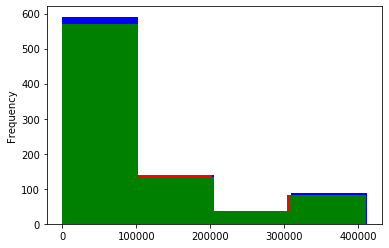

In [41]:
# Plot comparative histograms for all three data sources using positive cases data
# Histograms shows the distribution of a data set

data_source_2['positive cases'].plot.hist(color='b', bins=4)
state_name_df['positive cases'].plot.hist(color='r', bins=4)
filtered_dates_3['positive cases'].plot.hist(color='g', bins=4)

# Our data is skewed right according to the direction of the tail.  This is a result of a lower boundary in a dataset
# A large majority of our data falls from 0 to 100K
# Our data sets overlay each other indicating the data sets are similar.


### Run t-tests for the three data sets

In [42]:
# Run t-tests, this compares two means and tells you if they are different from each other
# P value is the probability the results occured by chance

# Determine t-score with p-value for Source #1 vs Source #2

# Rename source variables
source_1 = state_name_df
source_2 = data_source_2
source_3 = filtered_dates_3

# Compare sources 1 and 2
scipy.stats.ttest_ind(source_1['positive cases'], source_2['positive cases'], equal_var=False)


Ttest_indResult(statistic=0.7510029780567161, pvalue=0.452759687237577)

In [43]:

# Compare sources 2 and 3
scipy.stats.ttest_ind(source_2['positive cases'], source_3['positive cases'], equal_var=False)



Ttest_indResult(statistic=0.012379668547029682, pvalue=0.9901241820077673)

In [44]:

# Compare sources 1 and 3
scipy.stats.ttest_ind(source_1['positive cases'], source_3['positive cases'], equal_var=False)




Ttest_indResult(statistic=0.7603801585593193, pvalue=0.44713950599714736)

In [45]:
# A t-score with a p-value larger than 0.05 states that the difference found is not "statistically significant". 
# When compared with each other, all three data sources have a t-score with a p-value larger than .05.  

## This proves our null hypothesis that our populations are statistically significantly different is not true.

### The fourth data source contained population data.

### Population data import and clean up 


In [46]:
# Pull population data
# COVID-19 US County JHU Data & Demographics
# Downloaded data from https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics/data?select=us_county.csv
# Saved as csv named population datasets

#Population data
#Load file to read
pop_file = ("Resources/population datasets.csv")

# Read csv file into DataFrame
pop_df = pd.read_csv(pop_file, index_col = "state")
pop_df

,fips,county,state_code,male,female,median_age,population,female_percentage,lat,long
state,,,,,,,,,,
Alabama,1001,Autauga County,AL,26874,28326,37.8,55200,51.315217,32.534923,-86.642730
Alabama,1003,Baldwin County,AL,101188,106919,42.8,208107,51.376936,30.727479,-87.722564
Alabama,1005,Barbour County,AL,13697,12085,39.9,25782,46.873788,31.869581,-85.393210
Alabama,1007,Bibb County,AL,12152,10375,39.9,22527,46.055844,32.998628,-87.126475
Alabama,1009,Blount County,AL,28434,29211,40.8,57645,50.673953,33.980869,-86.567380
...,...,...,...,...,...,...,...,...,...,...
Puerto Rico,72145,Vega Baja Municipio,NaN,25580,27791,40.7,53371,52.071350,18.428461,-66.397926
Puerto Rico,72147,Vieques Municipio,NaN,4332,4439,43.6,8771,50.609965,18.122662,-65.439095
Puerto Rico,72149,Villalba Municipio,NaN,11169,11824,38.8,22993,51.424347,18.128155,-66.472816


In [47]:
# Narrow down columns of pop_df to state and population
narrow_pop_df = pop_df[["population", "lat", "long"]]
narrow_pop_df

,population,lat,long
state,,,
Alabama,55200,32.534923,-86.642730
Alabama,208107,30.727479,-87.722564
Alabama,25782,31.869581,-85.393210
Alabama,22527,32.998628,-87.126475
Alabama,57645,33.980869,-86.567380
...,...,...,...
Puerto Rico,53371,18.428461,-66.397926
Puerto Rico,8771,18.122662,-65.439095
Puerto Rico,22993,18.128155,-66.472816


In [48]:
# Filter out Florida, Georgia, New York, Texas and Washington
states = ["Florida", "Georgia", "New York", "Texas", "New Jersey", "Connecticut"]
pop_filter_df  = narrow_pop_df[narrow_pop_df.index.isin(states)]
pop_filter_df

,population,lat,long
state,,,
Connecticut,944348,41.270795,-73.389381
Connecticut,894730,41.806406,-72.732873
Connecticut,183031,41.792481,-73.245332
Connecticut,163368,41.463188,-72.535144
Connecticut,859339,41.410478,-72.932078
...,...,...,...
Texas,43815,32.786406,-95.382075
Texas,8571,33.172994,-102.827783
Texas,18114,33.176623,-98.687735


In [49]:
state_pop_df = pop_filter_df.groupby('state')['population'].sum()
state_pop_df

state
Connecticut     3581504
Florida        20598139
Georgia        10297484
New Jersey      8881845
New York       19618453
Texas          27885195
Name: population, dtype: int64

In [50]:
# Save to csv file
state_pop_df.to_csv("output_data/state_pop_df.csv")

#### The fifth data source contained information for state closings and reopening dates.

### Dataset for state data with state information
#### This will be output into output_data/state_df

In [51]:
# Build dataset with state data

# This is a Washington Post website.  
# Data on deaths and cases comes from Post reporting and Johns Hopkins University. 
# Post-reported data is gathered from state sites and from county and city sites for certain jurisdictions. 
# Reference https://www.washingtonpost.com/graphics/2020/national/states-reopening-coronavirus-map/

data = {'State':['Florida', 'Georgia', 'New York', 'Texas', 'New Jersey', 'Connecticut'], 
        'Governor':['Ron DeSantis (R)','Brian Kemp (R)', 'Andrew Cuomo (D)','Greg Abbott (R)', 'Phil Murphy (D)', 'Ned Lamont (D)' ],
       'Statewide Shelter in Place Date':['4/2/20','4/3/20', '3/22/20','4/2/20', '3/21/20', '3/23/20'],
       'Phase One Reopening Date':['5/4/20', '4/24/20', 'Still closed','5/1/20', "Still closed", 'Still closed' ],
        'Number Days Closed': [32, 21, 125, 29, 30,28 ],
       'Total cases (3/1/20 to 7/21/20)': [379619, 145575, 408886, 332434, 180295, 49077 ],
       'Population': [20598139, 10297484, 19618453, 27885195,8881845,3581504 ]} 
  
# Create DataFrame 
state_df = pd.DataFrame(data) 
  
# Print the output
state_df

,State,Governor,Statewide Shelter in Place Date,Phase One Reopening Date,Number Days Closed,Total cases (3/1/20 to 7/21/20),Population
0,Florida,Ron DeSantis (R),4/2/20,5/4/20,32,379619,20598139
1,Georgia,Brian Kemp (R),4/3/20,4/24/20,21,145575,10297484
2,New York,Andrew Cuomo (D),3/22/20,Still closed,125,408886,19618453
3,Texas,Greg Abbott (R),4/2/20,5/1/20,29,332434,27885195
4,New Jersey,Phil Murphy (D),3/21/20,Still closed,30,180295,8881845
5,Connecticut,Ned Lamont (D),3/23/20,Still closed,28,49077,3581504


In [52]:
# Save to csv file
state_df.to_csv("output_data/state_df.csv")